In [3]:
import pandas as pd
import numpy as np # library to handle data in a vectorized manner
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_d0e85a766fe745cb972f8a79765ed893 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='G5tBt8khKsWCrd-awY6VaVSBP4b0hCxk7N-LM3TwSZh0',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_d0e85a766fe745cb972f8a79765ed893.get_object(Bucket='capstoneibm-donotdelete-pr-argwpedwp2hqxt',Key='nz-populated-places-points.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.1               |             py_0          26 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                       

,WKT,gid,name,lid,desc_code,pop,rcode,tcode,region,tla,class,GEOMETRY_X,GEOMETRY_Y
0,POINT (171.540553294505 -42.3486331678849),1001,Ahaura,16892,LOC,111,12,56,West Coast Region,Grey District,6,171.540553,-42.348633
1,POINT (173.910115147204 -41.2678894730379),1007,Anakiwa,52102,LOC,180,18,53,Marlborough Region,Marlborough District,6,173.910115,-41.267889
2,POINT (170.701691797057 -45.7778521452232),1008,Aramoana,13283,LOC,141,14,71,Otago Region,Dunedin City,6,170.701692,-45.777852
3,POINT (171.561950057842 -42.9400180874896),1010,Arthurs Pass,17537,LOC,87,13,62,Canterbury Region,Selwyn District,6,171.561950,-42.940018
4,POINT (172.598954443667 -43.2756544341018),1013,Ashley,22209,LOC,225,13,59,Canterbury Region,Waimakariri District,6,172.598954,-43.275654


In [4]:
df_data_1.sort_values(by=['pop'],ascending=False,inplace=True)

In [5]:
df_2=df_data_1.head(14)

In [6]:
df_2.reset_index(drop=True,inplace=True)

In [7]:
df_2

,WKT,gid,name,lid,desc_code,pop,rcode,tcode,region,tla,class,GEOMETRY_X,GEOMETRY_Y
0,POINT (174.765988673178 -36.847013384135),2148,Auckland,37145,METR,1137141,2,7,Auckland Region,Auckland City,2,174.765989,-36.847013
1,POINT (172.636655689266 -43.532049345829),1036,Christchurch,22423,METR,333204,13,60,Canterbury Region,Christchurch City,2,172.636656,-43.532049
2,POINT (174.776889697928 -41.2911794278825),2158,Wellington,53400,METR,164508,9,47,Wellington Region,Wellington City,2,174.776890,-41.291179
3,POINT (175.281741601314 -37.7858627898306),2164,Hamilton,57206,TOWN,128988,3,16,Waikato Region,Hamilton City,2,175.281742,-37.785863
4,POINT (170.503575344339 -45.8741229302069),1054,Dunedin,13106,METR,87384,14,71,Otago Region,Dunedin City,2,170.503575,-45.874123
5,POINT (174.904349481634 -41.2096515718131),2174,Lower Hutt,53465,USAT,76845,9,46,Wellington Region,Lower Hutt City,2,174.904349,-41.209652
6,POINT (175.610996460099 -40.3561238045002),2143,Palmerston North,31588,TOWN,68439,8,40,Manawatu-Wanganui Region,Palmerston North City,2,175.610996,-40.356124
7,POINT (176.169876316807 -37.6843295191399),2130,Tauranga,53818,TOWN,64986,4,23,Bay of Plenty Region,Tauranga City,2,176.169876,-37.684330
8,POINT (176.918314003245 -39.4901741694689),2161,Napier,55668,TOWN,52302,6,31,Hawke's Bay Region,Napier City,2,176.918314,-39.490174
9,POINT (176.251522597358 -38.1378470729475),2156,Rotorua,47740,TOWN,49533,4,24,Bay of Plenty Region,Rotorua District,2,176.251523,-38.137847


In [8]:

body = client_d0e85a766fe745cb972f8a79765ed893.get_object(Bucket='capstoneibm-donotdelete-pr-argwpedwp2hqxt',Key='nz-populated-places-points-ahp.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_0 = pd.read_excel(body)
df_data_0.head()


,name,HAP
0,Auckland,800000
1,Christchurch,450000
2,Wellington,600000
3,Hamilton,575000
4,Dunedin,460000


In [9]:
df_2=df_2.join(df_data_0.set_index('name'),on='name')

In [10]:
df_2.drop(['WKT','gid','lid','tcode','rcode',],axis=1,inplace=True)

In [11]:
df_2

,name,desc_code,pop,region,tla,class,GEOMETRY_X,GEOMETRY_Y,HAP
0,Auckland,METR,1137141,Auckland Region,Auckland City,2,174.765989,-36.847013,800000
1,Christchurch,METR,333204,Canterbury Region,Christchurch City,2,172.636656,-43.532049,450000
2,Wellington,METR,164508,Wellington Region,Wellington City,2,174.776890,-41.291179,600000
3,Hamilton,TOWN,128988,Waikato Region,Hamilton City,2,175.281742,-37.785863,575000
4,Dunedin,METR,87384,Otago Region,Dunedin City,2,170.503575,-45.874123,460000
5,Lower Hutt,USAT,76845,Wellington Region,Lower Hutt City,2,174.904349,-41.209652,657100
6,Palmerston North,TOWN,68439,Manawatu-Wanganui Region,Palmerston North City,2,175.610996,-40.356124,460000
7,Tauranga,TOWN,64986,Bay of Plenty Region,Tauranga City,2,176.169876,-37.684330,670100
8,Napier,TOWN,52302,Hawke's Bay Region,Napier City,2,176.918314,-39.490174,555000
9,Rotorua,TOWN,49533,Bay of Plenty Region,Rotorua District,2,176.251523,-38.137847,455000


In [12]:
address = 'New Zealand'

geolocator = Nominatim(user_agent="nz_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New Zealand are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New Zealand are -41.5000831, 172.8344077.


In [20]:
# create map of Manhattan using latitude and longitude values
map_nz = folium.Map(location=[latitude, longitude], zoom_start=6)

# add markers to map
for lat, lng, label in zip(df_2['GEOMETRY_Y'], df_2['GEOMETRY_X'], df_2['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nz)  
    
map_nz

In [22]:
map_nz.save("nz.png")

In [23]:
CLIENT_ID = 'SHE2VTZE10WC04OEHVTAHUIYRMA3VBQHYCKSHLEP0CNWW5YJ' # your Foursquare ID
CLIENT_SECRET = 'M4VVFHKYJER5XZUDJVQ4KDLUXKKRSNJQXO5QPMKVV1INMEPQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SHE2VTZE10WC04OEHVTAHUIYRMA3VBQHYCKSHLEP0CNWW5YJ
CLIENT_SECRET:M4VVFHKYJER5XZUDJVQ4KDLUXKKRSNJQXO5QPMKVV1INMEPQ


In [26]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [27]:
nz_venues = getNearbyVenues(names=df_2['name'],
                                   latitudes=df_2['GEOMETRY_Y'],
                                   longitudes=df_2['GEOMETRY_X']
                                  )


Auckland
Christchurch
Wellington
Hamilton
Dunedin
Lower Hutt
Palmerston North
Tauranga
Napier
Rotorua
Porirua
Whangarei
Invercargill
New Plymouth


In [28]:
print(nz_venues.shape)
nz_venues.head()

(850, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Auckland,-36.847013,174.765989,Cafe Melba,-36.847269,174.766893,Café
1,Auckland,-36.847013,174.765989,Cassia,-36.845605,174.767207,Indian Restaurant
2,Auckland,-36.847013,174.765989,Culprit,-36.847313,174.765050,Bistro
3,Auckland,-36.847013,174.765989,Sal's Authentic New York Pizza,-36.846371,174.768150,Pizza Place
4,Auckland,-36.847013,174.765989,Renkon,-36.848354,174.766119,Japanese Restaurant


In [29]:
nz_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Auckland,100,100,100,100,100,100
Christchurch,100,100,100,100,100,100
Dunedin,100,100,100,100,100,100
Hamilton,76,76,76,76,76,76
Invercargill,17,17,17,17,17,17
Lower Hutt,34,34,34,34,34,34
Napier,54,54,54,54,54,54
New Plymouth,47,47,47,47,47,47
Palmerston North,60,60,60,60,60,60


In [30]:
print('There are {} uniques categories.'.format(len(nz_venues['Venue Category'].unique())))

There are 165 uniques categories.


In [31]:
# one hot encoding
nz_onehot = pd.get_dummies(nz_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
nz_onehot['Neighborhood'] = nz_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [nz_onehot.columns[-1]] + list(nz_onehot.columns[:-1])
nz_onehot = nz_onehot[fixed_columns]

nz_onehot.head()

,Neighborhood,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store
0,Auckland,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Auckland,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Auckland,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Auckland,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Auckland,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
nz_onehot.shape

(850, 166)

In [33]:
nz_grouped = nz_onehot.groupby('Neighborhood').mean().reset_index()
nz_grouped

,Neighborhood,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store
0,Auckland,0.000000,0.010000,0.000000,0.000000,0.020000,0.000000,0.010,0.00,0.020000,...,0.01,0.020000,0.000000,0.000000,0.02,0.00,0.00,0.000000,0.000000,0.000000
1,Christchurch,0.010000,0.010000,0.000000,0.010000,0.020000,0.000000,0.000,0.01,0.000000,...,0.00,0.000000,0.000000,0.010000,0.01,0.00,0.00,0.000000,0.000000,0.000000
2,Dunedin,0.000000,0.010000,0.000000,0.000000,0.040000,0.000000,0.000,0.00,0.000000,...,0.01,0.010000,0.000000,0.000000,0.00,0.00,0.01,0.000000,0.000000,0.000000
3,Hamilton,0.000000,0.000000,0.000000,0.000000,0.013158,0.000000,0.000,0.00,0.000000,...,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.013158,0.013158,0.000000
4,Invercargill,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.00,0.000000,...,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000
5,Lower Hutt,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.000,0.00,0.029412,...,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000
6,Napier,0.000000,0.000000,0.000000,0.018519,0.018519,0.000000,0.000,0.00,0.000000,...,0.00,0.018519,0.000000,0.000000,0.00,0.00,0.00,0.018519,0.000000,0.000000
7,New Plymouth,0.042553,0.021277,0.000000,0.000000,0.000000,0.000000,0.000,0.00,0.000000,...,0.00,0.000000,0.000000,0.021277,0.00,0.00,0.00,0.000000,0.000000,0.000000
8,Palmerston North,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000,0.00,0.000000,...,0.00,0.000000,0.016667,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000
9,Porirua,0.000000,0.000000,0.032258,0.000000,0.000000,0.032258,0.000,0.00,0.000000,...,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000


In [34]:
nz_grouped.shape

(14, 166)

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = nz_grouped['Neighborhood']

for ind in np.arange(nz_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nz_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Auckland,Café,Japanese Restaurant,Pizza Place,Plaza,Korean Restaurant,Steakhouse,Mexican Restaurant,Bar,Indian Restaurant,Pub
1,Christchurch,Café,Hotel,Bar,Japanese Restaurant,Thai Restaurant,Coffee Shop,Restaurant,Gastropub,Supermarket,Italian Restaurant
2,Dunedin,Café,Coffee Shop,Bar,Asian Restaurant,Hotel,Shopping Mall,Brewery,Theater,Restaurant,Pub
3,Hamilton,Café,Restaurant,Bar,Fast Food Restaurant,Hotel,Coffee Shop,Department Store,Mexican Restaurant,Performing Arts Venue,Steakhouse
4,Invercargill,Café,Burger Joint,Department Store,Bar,Food,Food & Drink Shop,Fast Food Restaurant,Supermarket,Movie Theater,Flower Shop
5,Lower Hutt,Café,Supermarket,Fast Food Restaurant,Indian Restaurant,Electronics Store,Burger Joint,Shoe Store,Shopping Mall,Portuguese Restaurant,Japanese Restaurant
6,Napier,Café,Restaurant,Fast Food Restaurant,Electronics Store,Thai Restaurant,Hotel,Beach,Organic Grocery,Paper / Office Supplies Store,Pub
7,New Plymouth,Restaurant,Café,Coffee Shop,American Restaurant,Hotel,Thai Restaurant,Electronics Store,Bar,Bakery,Burger Joint
8,Palmerston North,Café,Fast Food Restaurant,Asian Restaurant,Coffee Shop,Grocery Store,Shopping Mall,Japanese Restaurant,Thai Restaurant,Brewery,Burger Joint
9,Porirua,Furniture / Home Store,Grocery Store,Café,Paper / Office Supplies Store,Skate Park,Pizza Place,Burger Joint,Pet Store,Fast Food Restaurant,Supermarket


In [37]:
nz_sc=df_2[['name','pop','HAP']]
nz_sc

,name,pop,HAP
0,Auckland,1137141,800000
1,Christchurch,333204,450000
2,Wellington,164508,600000
3,Hamilton,128988,575000
4,Dunedin,87384,460000
5,Lower Hutt,76845,657100
6,Palmerston North,68439,460000
7,Tauranga,64986,670100
8,Napier,52302,555000
9,Rotorua,49533,455000


In [38]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


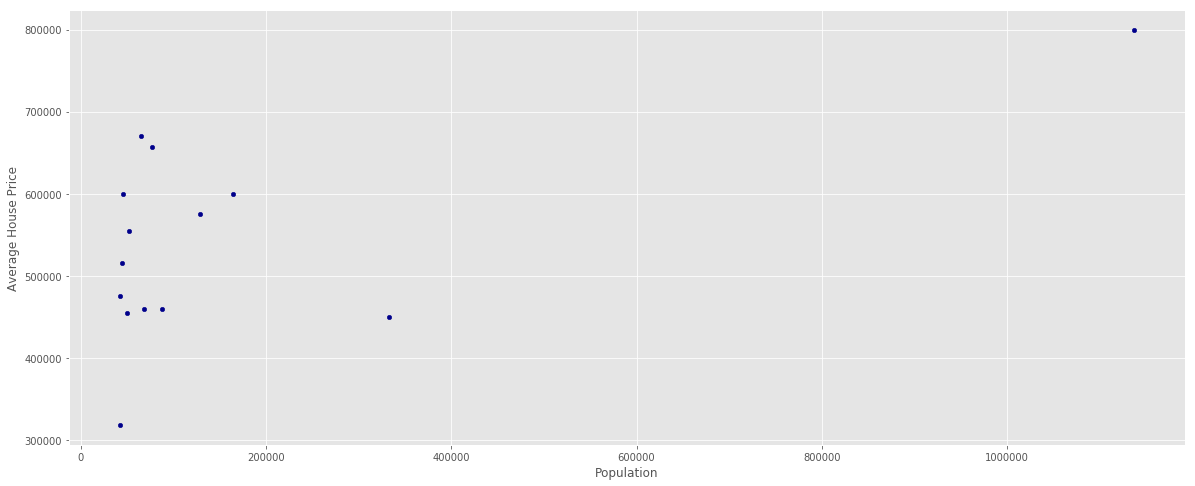

In [39]:
nz_sc.plot(kind='scatter',x='pop', y='HAP',figsize=(20, 8), color='darkblue')

plt.xlabel('Population')
plt.ylabel('Average House Price')

plt.show()


In [40]:
nz_sc.drop('name', 1,inplace=True)
nz_sc

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,pop,HAP
0,1137141,800000
1,333204,450000
2,164508,600000
3,128988,575000
4,87384,460000
5,76845,657100
6,68439,460000
7,64986,670100
8,52302,555000
9,49533,455000


In [42]:
from sklearn.preprocessing import StandardScaler

nz_grouped_clustering= StandardScaler().fit_transform(nz_sc)

nz_grouped_clustering

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 3.47270088,  2.21867512],
       [ 0.59483645, -0.79298982],
       [-0.00904696,  0.49772373],
       [-0.1361984 ,  0.2826048 ],
       [-0.28512881, -0.70694225],
       [-0.32285542,  0.98905535],
       [-0.35294649, -0.70694225],
       [-0.36530724,  1.10091719],
       [-0.41071233,  0.11050966],
       [-0.42062456, -0.74996603],
       [-0.43318936,  0.49772373],
       [-0.43653997, -0.23368061],
       [-0.44712876, -1.92881774],
       [-0.44785903, -0.57787089]])

In [43]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nz_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:14] 

array([2, 3, 1, 1, 4, 1, 4, 1, 1, 4, 1, 4, 0, 4], dtype=int32)

In [44]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

nz_merged = df_2


In [45]:
nz_merged=nz_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'),on='name')

In [46]:
nz_merged

,name,desc_code,pop,region,tla,class,GEOMETRY_X,GEOMETRY_Y,HAP,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Auckland,METR,1137141,Auckland Region,Auckland City,2,174.765989,-36.847013,800000,2,Café,Japanese Restaurant,Pizza Place,Plaza,Korean Restaurant,Steakhouse,Mexican Restaurant,Bar,Indian Restaurant,Pub
1,Christchurch,METR,333204,Canterbury Region,Christchurch City,2,172.636656,-43.532049,450000,3,Café,Hotel,Bar,Japanese Restaurant,Thai Restaurant,Coffee Shop,Restaurant,Gastropub,Supermarket,Italian Restaurant
2,Wellington,METR,164508,Wellington Region,Wellington City,2,174.776890,-41.291179,600000,0,Café,Coffee Shop,Bar,Restaurant,Vietnamese Restaurant,Italian Restaurant,Pizza Place,Asian Restaurant,Burger Joint,Chinese Restaurant
3,Hamilton,TOWN,128988,Waikato Region,Hamilton City,2,175.281742,-37.785863,575000,1,Café,Restaurant,Bar,Fast Food Restaurant,Hotel,Coffee Shop,Department Store,Mexican Restaurant,Performing Arts Venue,Steakhouse
4,Dunedin,METR,87384,Otago Region,Dunedin City,2,170.503575,-45.874123,460000,1,Café,Coffee Shop,Bar,Asian Restaurant,Hotel,Shopping Mall,Brewery,Theater,Restaurant,Pub
5,Lower Hutt,USAT,76845,Wellington Region,Lower Hutt City,2,174.904349,-41.209652,657100,1,Café,Supermarket,Fast Food Restaurant,Indian Restaurant,Electronics Store,Burger Joint,Shoe Store,Shopping Mall,Portuguese Restaurant,Japanese Restaurant
6,Palmerston North,TOWN,68439,Manawatu-Wanganui Region,Palmerston North City,2,175.610996,-40.356124,460000,1,Café,Fast Food Restaurant,Asian Restaurant,Coffee Shop,Grocery Store,Shopping Mall,Japanese Restaurant,Thai Restaurant,Brewery,Burger Joint
7,Tauranga,TOWN,64986,Bay of Plenty Region,Tauranga City,2,176.169876,-37.684330,670100,4,Café,Coffee Shop,Hotel,Pub,Japanese Restaurant,Middle Eastern Restaurant,Gastropub,Park,Seafood Restaurant,Fast Food Restaurant
8,Napier,TOWN,52302,Hawke's Bay Region,Napier City,2,176.918314,-39.490174,555000,4,Café,Restaurant,Fast Food Restaurant,Electronics Store,Thai Restaurant,Hotel,Beach,Organic Grocery,Paper / Office Supplies Store,Pub
9,Rotorua,TOWN,49533,Bay of Plenty Region,Rotorua District,2,176.251523,-38.137847,455000,1,Café,Hotel,Pizza Place,Hostel,Motel,Pedestrian Plaza,Pool,Steakhouse,Furniture / Home Store,Middle Eastern Restaurant


In [48]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=6)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nz_merged['GEOMETRY_Y'], nz_merged['GEOMETRY_X'], nz_merged['name'], nz_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<h1>Examine Clusters</h1>

In [49]:
cluster1=nz_merged.loc[nz_merged['Cluster Labels'] == 0]
cluster1

,name,desc_code,pop,region,tla,class,GEOMETRY_X,GEOMETRY_Y,HAP,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Wellington,METR,164508,Wellington Region,Wellington City,2,174.77689,-41.291179,600000,0,Café,Coffee Shop,Bar,Restaurant,Vietnamese Restaurant,Italian Restaurant,Pizza Place,Asian Restaurant,Burger Joint,Chinese Restaurant


In [50]:
cluster2=nz_merged.loc[nz_merged['Cluster Labels'] == 1]
cluster2

,name,desc_code,pop,region,tla,class,GEOMETRY_X,GEOMETRY_Y,HAP,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Hamilton,TOWN,128988,Waikato Region,Hamilton City,2,175.281742,-37.785863,575000,1,Café,Restaurant,Bar,Fast Food Restaurant,Hotel,Coffee Shop,Department Store,Mexican Restaurant,Performing Arts Venue,Steakhouse
4,Dunedin,METR,87384,Otago Region,Dunedin City,2,170.503575,-45.874123,460000,1,Café,Coffee Shop,Bar,Asian Restaurant,Hotel,Shopping Mall,Brewery,Theater,Restaurant,Pub
5,Lower Hutt,USAT,76845,Wellington Region,Lower Hutt City,2,174.904349,-41.209652,657100,1,Café,Supermarket,Fast Food Restaurant,Indian Restaurant,Electronics Store,Burger Joint,Shoe Store,Shopping Mall,Portuguese Restaurant,Japanese Restaurant
6,Palmerston North,TOWN,68439,Manawatu-Wanganui Region,Palmerston North City,2,175.610996,-40.356124,460000,1,Café,Fast Food Restaurant,Asian Restaurant,Coffee Shop,Grocery Store,Shopping Mall,Japanese Restaurant,Thai Restaurant,Brewery,Burger Joint
9,Rotorua,TOWN,49533,Bay of Plenty Region,Rotorua District,2,176.251523,-38.137847,455000,1,Café,Hotel,Pizza Place,Hostel,Motel,Pedestrian Plaza,Pool,Steakhouse,Furniture / Home Store,Middle Eastern Restaurant
13,New Plymouth,TOWN,41925,Taranaki Region,New Plymouth District,2,174.076095,-39.057195,475000,1,Restaurant,Café,Coffee Shop,American Restaurant,Hotel,Thai Restaurant,Electronics Store,Bar,Bakery,Burger Joint


In [51]:
cluster3=nz_merged.loc[nz_merged['Cluster Labels'] == 2]
cluster3

,name,desc_code,pop,region,tla,class,GEOMETRY_X,GEOMETRY_Y,HAP,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Auckland,METR,1137141,Auckland Region,Auckland City,2,174.765989,-36.847013,800000,2,Café,Japanese Restaurant,Pizza Place,Plaza,Korean Restaurant,Steakhouse,Mexican Restaurant,Bar,Indian Restaurant,Pub


In [52]:
cluster4=nz_merged.loc[nz_merged['Cluster Labels'] == 3]
cluster4

,name,desc_code,pop,region,tla,class,GEOMETRY_X,GEOMETRY_Y,HAP,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Christchurch,METR,333204,Canterbury Region,Christchurch City,2,172.636656,-43.532049,450000,3,Café,Hotel,Bar,Japanese Restaurant,Thai Restaurant,Coffee Shop,Restaurant,Gastropub,Supermarket,Italian Restaurant


In [53]:
cluster5=nz_merged.loc[nz_merged['Cluster Labels'] == 4]
cluster5

,name,desc_code,pop,region,tla,class,GEOMETRY_X,GEOMETRY_Y,HAP,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Tauranga,TOWN,64986,Bay of Plenty Region,Tauranga City,2,176.169876,-37.684330,670100,4,Café,Coffee Shop,Hotel,Pub,Japanese Restaurant,Middle Eastern Restaurant,Gastropub,Park,Seafood Restaurant,Fast Food Restaurant
8,Napier,TOWN,52302,Hawke's Bay Region,Napier City,2,176.918314,-39.490174,555000,4,Café,Restaurant,Fast Food Restaurant,Electronics Store,Thai Restaurant,Hotel,Beach,Organic Grocery,Paper / Office Supplies Store,Pub
10,Porirua,USAT,46023,Wellington Region,Porirua City,2,174.842505,-41.138316,600000,4,Furniture / Home Store,Grocery Store,Café,Paper / Office Supplies Store,Skate Park,Pizza Place,Burger Joint,Pet Store,Fast Food Restaurant,Supermarket
11,Whangarei,TOWN,45087,Northland Region,Whangarei District,2,174.322041,-35.726603,515000,4,Café,Supermarket,Fast Food Restaurant,Gastropub,Middle Eastern Restaurant,Coffee Shop,Bakery,Restaurant,Electronics Store,Filipino Restaurant
12,Invercargill,TOWN,42129,Southland Region,Invercargill City,2,168.347374,-46.412985,318000,4,Café,Burger Joint,Department Store,Bar,Food,Food & Drink Shop,Fast Food Restaurant,Supermarket,Movie Theater,Flower Shop


In [54]:
nz_merged.groupby('Cluster Labels')['pop','HAP'].mean()

,pop,HAP
Cluster Labels,,
0,164508.0,600000.000000
1,75519.0,513683.333333
2,1137141.0,800000.000000
3,333204.0,450000.000000
4,50105.4,531620.000000
